In [1]:
#importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time
import seaborn as sns
import datetime
from fbprophet import Prophet 

In [2]:
#importing the dataset
bh = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]

In [4]:
bh.head(5)

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Aug 09, 2018",6305.56,6625.73,6249.07,6568.23,4267040000,108444366975
1,"Aug 08, 2018",6746.85,6746.85,6226.22,6305.80,5064430000,116020470612
2,"Aug 07, 2018",6958.32,7146.56,6748.24,6753.12,4682800000,119643646094
3,"Aug 06, 2018",7062.94,7166.55,6890.54,6951.80,3925900000,121430864537
4,"Aug 05, 2018",7031.08,7102.77,6940.70,7068.48,3679110000,120869247490


In [5]:
#viewing data types
bh.dtypes

Date           object
Open*         float64
High          float64
Low           float64
Close**       float64
Volume         object
Market Cap      int64
dtype: object

In [6]:
#converting necessary datat types
bh['Date'] = pd.DatetimeIndex(bh['Date'])

In [7]:
bh.dtypes

Date          datetime64[ns]
Open*                float64
High                 float64
Low                  float64
Close**              float64
Volume                object
Market Cap             int64
dtype: object

In [8]:
# The prophet expects to be a ds column  that contains the datetime field
#and a y column that contains the value we are wanting to forecast.
bh = bh.rename(columns={'Date': 'ds', 'Close**': 'y'})

In [9]:
bh.tail(5)

,ds,Open*,High,Low,y,Volume,Market Cap
1925,2013-05-02,116.38,125.60,92.28,105.21,-,1292189952
1926,2013-05-01,139.00,139.89,107.72,116.99,-,1542819968
1927,2013-04-30,144.00,146.93,134.05,139.00,-,1597779968
1928,2013-04-29,134.44,147.49,134.00,144.54,-,1491160064
1929,2013-04-28,135.30,135.98,132.10,134.21,-,1500519936


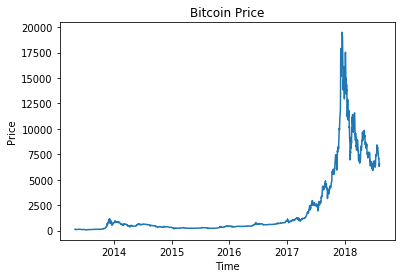

In [10]:
#Visualizing given data
plt.plot(bh['ds'], bh['y'])
plt.title('Bitcoin Price')
plt.ylabel('Price');
plt.xlabel('Time');
plt.show()

In [11]:
#Creating and fitting Model to data 
model = Prophet(interval_width=0.95)
model.fit(bh)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jashw\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [12]:
#Creating future dates to predict(for 3 years or 36 months)
future_dates = model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
1961,2021-04-01
1962,2021-05-01
1963,2021-06-01
1964,2021-07-01
1965,2021-08-01


In [13]:
#Forcasting Future Dates
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1961,2021-04-01,24989.427679,14023.958778,36417.722913
1962,2021-05-01,25701.401846,14138.739411,37558.776034
1963,2021-06-01,25785.618000,13859.937244,38144.671185
1964,2021-07-01,25822.802079,13540.042800,38532.180337
1965,2021-08-01,26428.895058,14618.190932,39550.201890


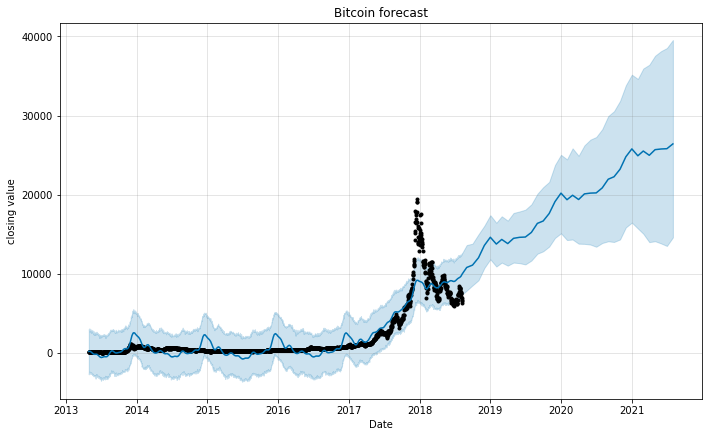

In [17]:
model.plot(forecast, xlabel = 'Date', ylabel = 'closing value', uncertainty=True)
plt.title('Bitcoin forecast')
plt.show();

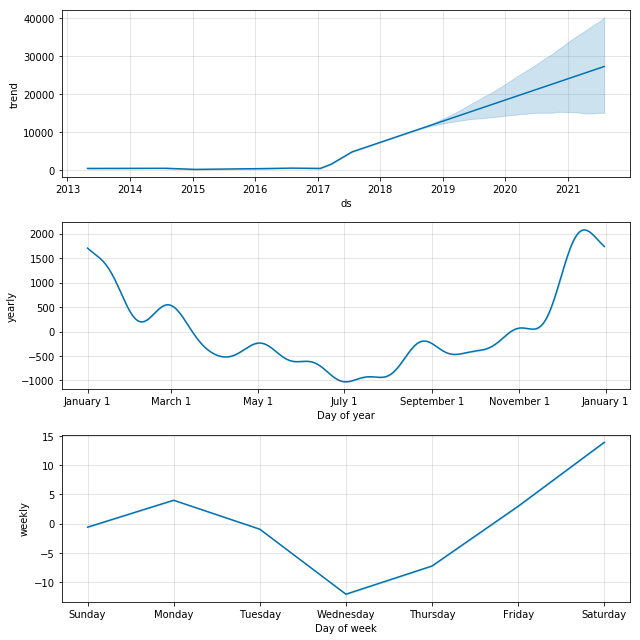

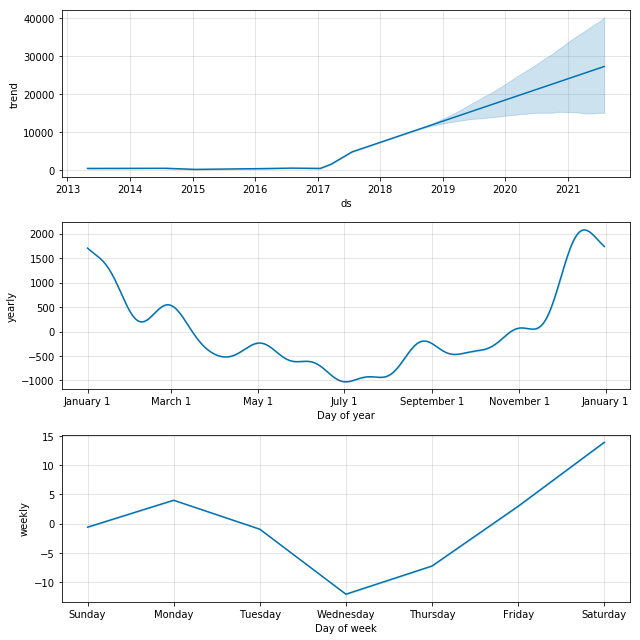

In [19]:
#Visualization in difftent time series
model.plot_components(forecast)